# Random Forest in Trading

In this code, we will create a Random Forest Classifier and train it to give the daily returns.

#### Importing the Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

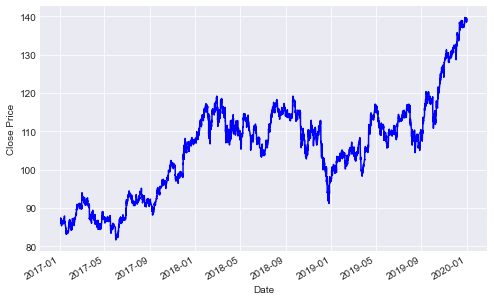

In [2]:
# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Read the data
data = pd.read_csv(path + 'JPM_2017_2019.csv', index_col=0)
data.index = pd.to_datetime(data.index)

data.close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

#### Creating Input and Output Dataset

In this step, we will use the same target and feature variable as we have taken in the previous chapters.

In [3]:
import sys
sys.path.append("..")

from data_modules.utility import get_target_features
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], \
                                    y[:split], y[split:]

#### Training the Machine Learning Model

All set with the data! Let's train a decision tree classifier model. The `RandomForestClassifier` function from tree is stored in variable `clf`, and then a fit method is called on it with `X_train` and `y_train` dataset as the parameters so that the classifier model can learn the relationship between input and output.

In [4]:
clf = RandomForestClassifier(random_state=5, max_depth=3, 
                             max_features=3)
# Create the model on train dataset
model = clf.fit(X_train, y_train)
predicted = model.predict(X_test)

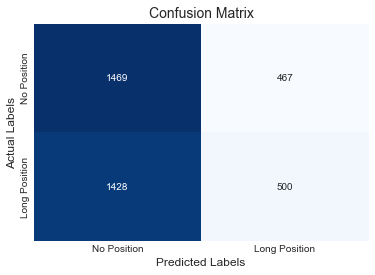

              precision    recall  f1-score   support

           0       0.51      0.76      0.61      1936
           1       0.52      0.26      0.35      1928

    accuracy                           0.51      3864
   macro avg       0.51      0.51      0.48      3864
weighted avg       0.51      0.51      0.48      3864



In [5]:
confusion_matrix_data = metrics.confusion_matrix(y_test, 
                                                 predicted)
# Plot the data

fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d",
            cmap='Blues', cbar=False, annot=True, ax=ax)

# Set the axes labels and the title
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No Position', 'Long Position'])
ax.yaxis.set_ticklabels(['No Position', 'Long Position'])

# Display the plot
plt.show()

print(metrics.classification_report(y_test, predicted))

#### Strategy Returns

In [6]:
# Calculate the percentage change
strategy_data = X_test[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = model.predict(X_test)

# Calculate the strategy returns
strategy_data['strategy_returns'] = \
    strategy_data['predicted_signal'].shift(1) * \
    strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

,pct_change,predicted_signal,strategy_returns
2019-05-28 12:15:00+00:00,0.000732,0,0.0
2019-05-28 12:30:00+00:00,-0.000366,0,-0.0
2019-05-28 12:45:00+00:00,0.000366,0,0.0
2019-05-28 13:00:00+00:00,0.000091,0,0.0
2019-05-28 13:15:00+00:00,-0.000091,0,-0.0


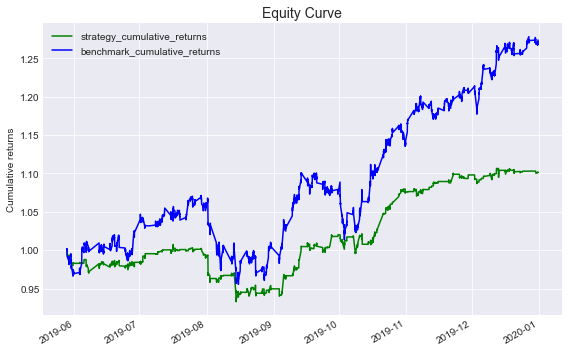

The maximum drawdown is -7.42%.


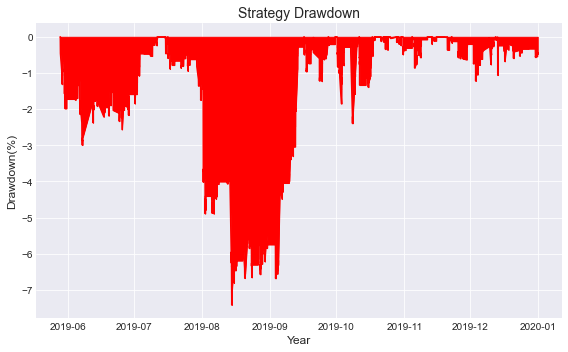

The Sharpe ratio is 1.63.


In [7]:
from data_modules.utility import get_performance
get_performance(strategy_data)

The output displays the strategy returns and daily returns according to the code for the Random Forest Classifier.